<a href="https://colab.research.google.com/github/yashmith-r/Digital-Image-Processing-Lab-/blob/main/DIP_LabExp4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Yashmith Raj - AP21110011218***

In [7]:
#1. Implement the following Piecewise Linear Transformation Function over an input image
#a. Contrast Stretching with  one and two given segments
#b. Gray Level Slicing (i. Without Background, ii. with Background)
#c. Bit Plane Slicing

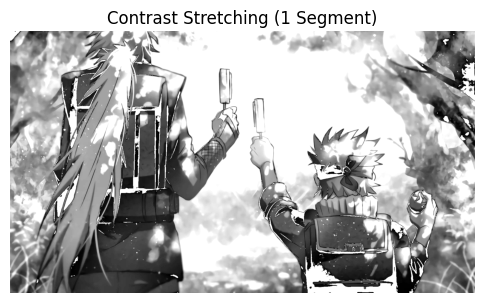

In [8]:
#CONTRAST SRETCHING WITH ONE SEGMENT
import cv2
import numpy as np
import matplotlib.pyplot as plt

def contrast_stretching_one_segment(img, in_min, in_max, out_min=0, out_max=255):
    img_stretch = (img - in_min) * ((out_max - out_min) / (in_max - in_min)) + out_min
    img_stretch = np.clip(img_stretch, out_min, out_max)
    return img_stretch.astype(np.uint8)

img = cv2.imread('Naruto_2.jpg', 0)


contrast_one_segment = contrast_stretching_one_segment(img, 50, 200)

plt.figure(figsize=(6,6))
plt.imshow(contrast_one_segment, cmap='gray')
plt.title('Contrast Stretching (1 Segment)')
plt.axis('off')
plt.show()


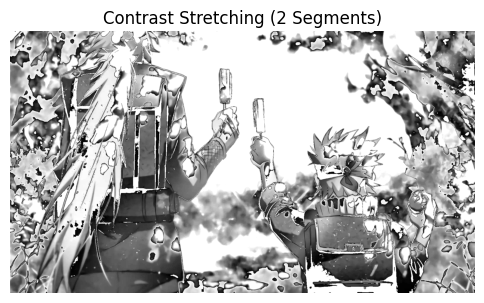

In [9]:
#Contrast stretching with two segments
def contrast_stretching_two_segments(img, in_min1, in_max1, in_min2, in_max2, out_min=0, out_max=255):
    img_stretch = np.zeros_like(img, dtype=np.uint8)
    segment1 = (img - in_min1) * ((out_max - out_min) / (in_max1 - in_min1)) + out_min
    segment2 = (img - in_min2) * ((out_max - out_min) / (in_max2 - in_min2)) + out_min

    img_stretch[img <= in_max1] = np.clip(segment1[img <= in_max1], out_min, out_max)
    img_stretch[img > in_max1] = np.clip(segment2[img > in_max1], out_min, out_max)

    return img_stretch.astype(np.uint8)


contrast_two_segments = contrast_stretching_two_segments(img, 50, 150, 150, 200)

plt.figure(figsize=(6,6))
plt.imshow(contrast_two_segments, cmap='gray')
plt.title('Contrast Stretching (2 Segments)')
plt.axis('off')
plt.show()


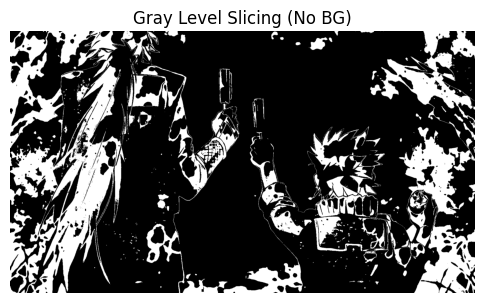

In [10]:
# Gray Level Slicing Without Background
def gray_level_slicing_without_background(img, low, high):
    result = np.zeros_like(img)
    result[(img >= low) & (img <= high)] = 255
    return result

gray_slicing_without_bg = gray_level_slicing_without_background(img, 100, 150)

plt.figure(figsize=(6,6))
plt.imshow(gray_slicing_without_bg, cmap='gray')
plt.title('Gray Level Slicing (No BG)')
plt.axis('off')
plt.show()


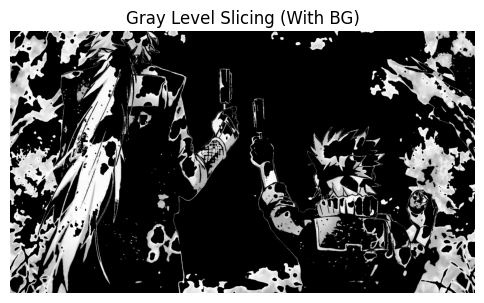

In [11]:
# Gray Level Slicing With Background
def gray_level_slicing_with_background(img, low, high):
    result = np.copy(img)
    result[(img < low) | (img > high)] = 0
    return result

gray_slicing_with_bg = gray_level_slicing_with_background(img, 100, 150)

plt.figure(figsize=(6,6))
plt.imshow(gray_slicing_with_bg, cmap='gray')
plt.title('Gray Level Slicing (With BG)')
plt.axis('off')
plt.show()


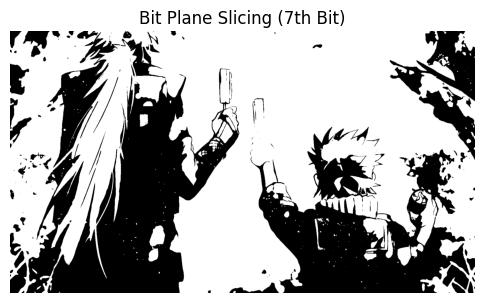

In [12]:
# Bit Plane Slicing
def bit_plane_slicing(img, bit):
    bit_plane = np.bitwise_and(img, 1 << bit) >> bit
    return bit_plane * 255

bit_plane_7 = bit_plane_slicing(img, 7)


plt.figure(figsize=(6,6))
plt.imshow(bit_plane_7, cmap='gray')
plt.title('Bit Plane Slicing (7th Bit)')
plt.axis('off')
plt.show()
